STEPS:
1. Data Cleaning
2. EDA
3. Feature Engineering
4. Modelling
5. Website
6. Deployment

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read dataset
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
data.shape

(1303, 12)

Limitation 1: less data
           2. remove unnecessary cols
           3. cleaning data like screen resolution column is bit messy

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


unnamed col will be removed, ram is obj ass it has word gb with it; so does the weight col

In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

no null values

In [8]:
# removinf unnamed col
data.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [10]:
# removing gb from ram and making it int type
data['Ram'] = data['Ram'].str.replace('GB', '')
data['Weight'] = data['Weight'].str.replace('kg', '')

In [11]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [13]:
# changing ram and weight to int and float
data['Ram'] = data['Ram'].astype('int32')
data['Weight'] = data['Weight'].astype('float32')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [15]:
# Exploratory data analysis (EDA) on Price column
# Univariant Analysis

import seaborn as sns

C:\Users\Dell\AppData\Local\Temp\ipykernel_7708\4196895882.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

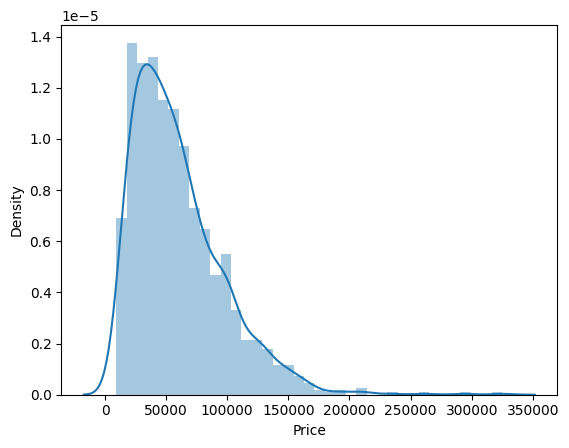

In [16]:
sns.distplot(data['Price'])

Observation: More Price Less Products

In [17]:
# check the value counts for each brand
data['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

<Axes: xlabel='Company'>

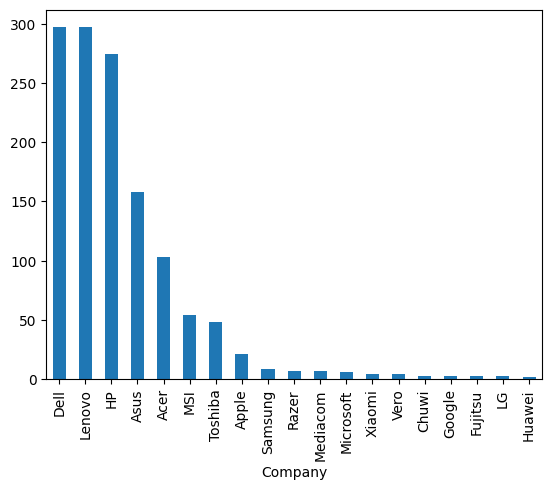

In [18]:
data['Company'].value_counts().plot(kind = 'bar')

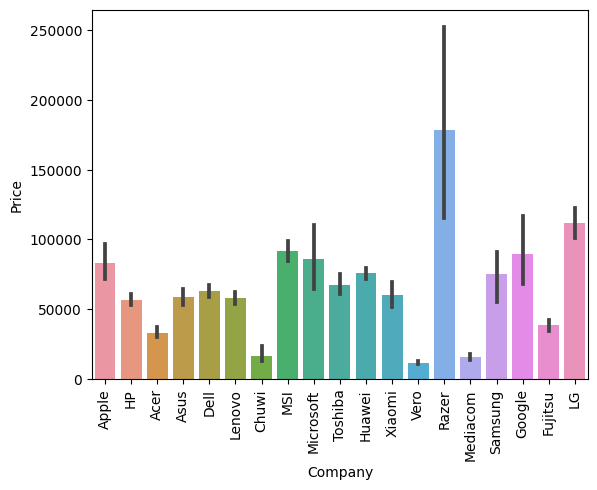

In [19]:
sns.barplot(x = data['Company'], y = data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [20]:
# plt.xticks(rotation='vertical') #wont work individually

<Axes: xlabel='TypeName'>

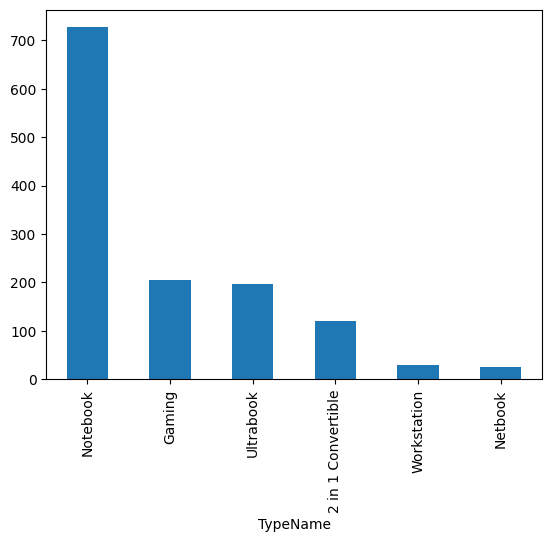

In [21]:
data['TypeName'].value_counts().plot(kind='bar')

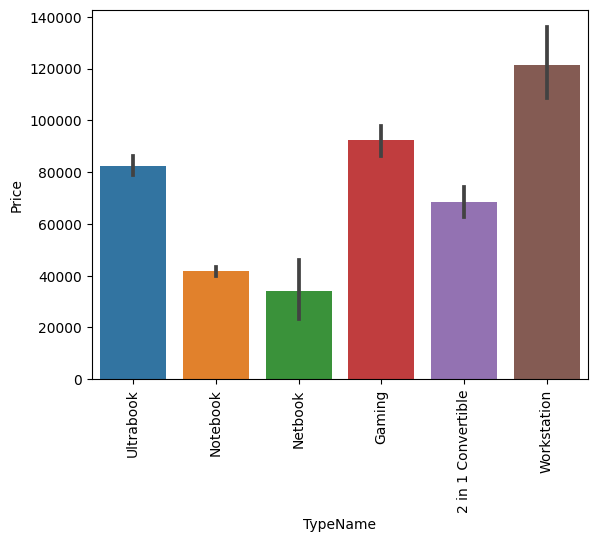

In [22]:
# we will check avg vlaue for all types
sns.barplot(x = data['TypeName'], y = data['Price'])
plt.xticks(rotation='vertical')
plt.show()

Observation: Price varies with Type

C:\Users\Dell\AppData\Local\Temp\ipykernel_7708\4048854786.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

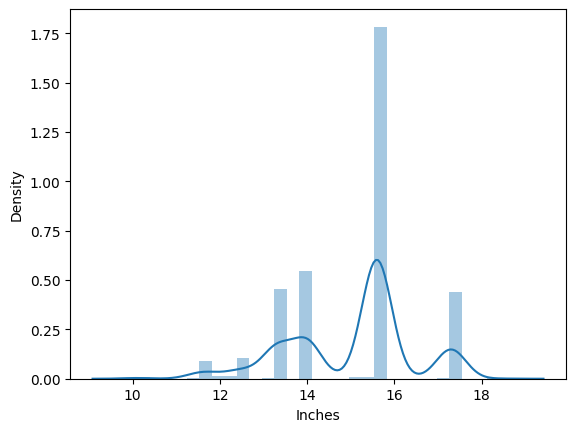

In [23]:
#  size column
sns.distplot(data['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

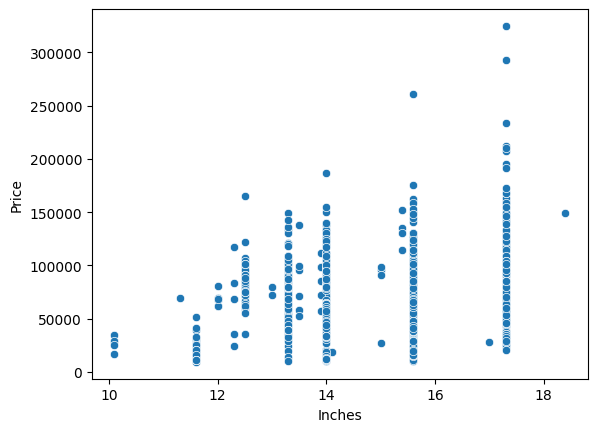

In [24]:
sns.scatterplot(x = data['Inches'], y = data['Price'])

Observation: Price has slight dependency on size

In [25]:
# Screen Resolution column ...info is not standardised so first we will see how many types are there
data['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

Observation: we have resolution in each entry but not details of display
            Also if it is a touchscreen laptop/ ips panel is present or not

using feature engineering we will make a column for touchscreen

In [26]:
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [27]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [28]:
# intitial cols 0 as those latops are not touchscreen
# if we write sample it will create a random subset
data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
169,HP,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,500GB HDD,Intel UHD Graphics 620,Windows 10,1.49,40173.1200,0
164,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Windows 10,2.10,18541.4400,0
231,HP,Notebook,15.6,1366x768,AMD E-Series 9000e 1.5GHz,4,500GB HDD,AMD Radeon R2,Windows 10,2.10,17582.4000,0
1123,Dell,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Linux,2.09,27899.0064,0
37,Dell,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.80,52161.1200,0


<Axes: xlabel='Touchscreen'>

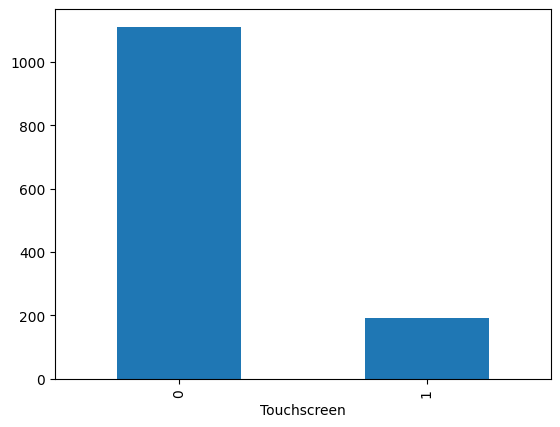

In [29]:
data['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

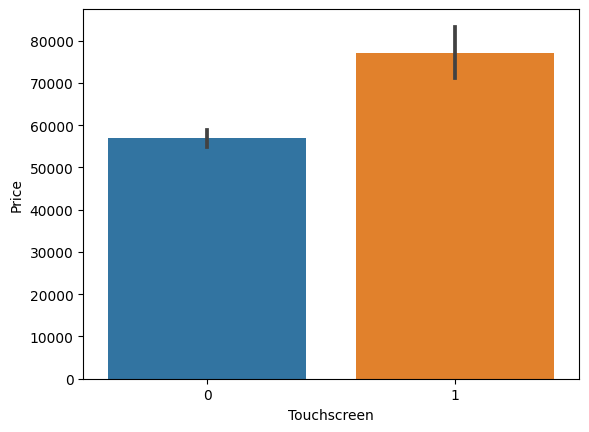

In [30]:
sns.barplot(x=data['Touchscreen'], y=data['Price'])

Obsesrvation: it is san important column

In [31]:
# make ips col
data['Ips'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [32]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='Ips'>

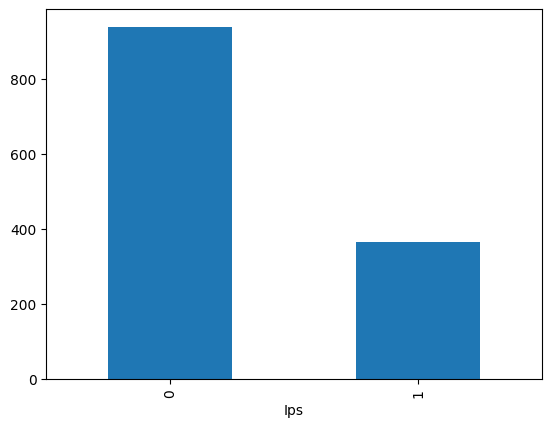

In [33]:
data['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

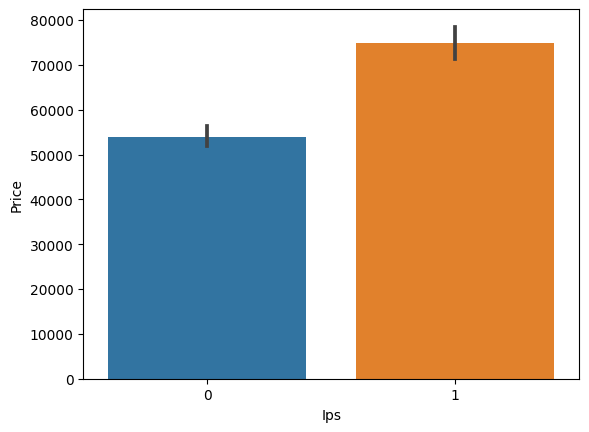

In [34]:
sns.barplot(x = data['Ips'], y = data['Price'])

Obs: plays a role

In [35]:
# we will make 2 cols x resolution and y resolution

# spltting data and putting it in temporary data frame
new = data['ScreenResolution'].str.split('x', n = 1, expand=True)

In [36]:
data['X_res'] = new[0]
data['Y_res'] = new[1]

In [37]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [38]:
# correctinf the x resolution
#  replacing comma and then finding in the string a particular patter
# regulalr expression is \d+\.?\d+
# and then extracting col[0] to take them out of list
data['X_res'] = data['X_res'].str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [39]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [40]:
# changing data type
data['X_res'] = data['X_res'].astype('int')
data['Y_res'] = data['Y_res'].astype('int')

In [41]:
# we splitted the resolution as if we find correlation with price 
data.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [42]:
# we will make new col ppi using inces x res and y res using the formula 
data['ppi'] = ((data['X_res']**2) + (data['Y_res']**2))**0.5/data['Inches'].astype('float')

In [43]:
# we can now remove screen resolution column
data.drop(columns=['ScreenResolution'], axis=1, inplace = True)

In [44]:
data.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [45]:
# now we can remove x res y res and inches 
data.drop(columns=['Inches', 'X_res', 'Y_res'], axis=1, inplace = True)

In [46]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [47]:
# CPU column too has random values so we will simplyfy it first
data['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [48]:
# feature engineer on cpu column
# we will simplfy it and divide in 5 cols
# i5, i7, i3, other intel processors, AMD
# for that we have to extract first 3 words

In [49]:
data['CpuName'] = data['Cpu'].apply(lambda x:" ".join(x.split()[0:3])) #join to covert list back to string
# data['Cpu Name'] = data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [50]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,CpuName
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [51]:
# based on these three words we will need a function

def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [52]:
data['Cpu brand'] = data['CpuName'].apply(fetch_processor)

In [53]:
data.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,CpuName,Cpu brand
897,HP,Notebook,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04,47952.0000,0,0,141.211998,Intel Core i7,Intel Core i7
877,Xiaomi,Ultrabook,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.28,49816.8000,0,1,165.632118,Intel Core i5,Intel Core i5
1045,HP,Notebook,Intel Core i5 6300U 2.4GHz,8,256GB SSD + 500GB HDD,Intel HD Graphics 520,Windows 10,1.84,112065.9552,0,0,141.211998,Intel Core i5,Intel Core i5
625,Lenovo,Notebook,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.20,47898.7200,0,0,141.211998,Intel Core i7,Intel Core i7
934,Toshiba,Notebook,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.47,58874.4000,0,1,157.350512,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

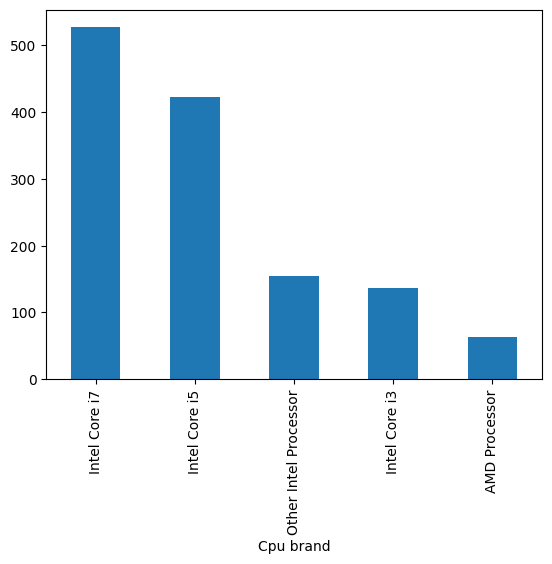

In [54]:
data['Cpu brand'].value_counts().plot(kind='bar')

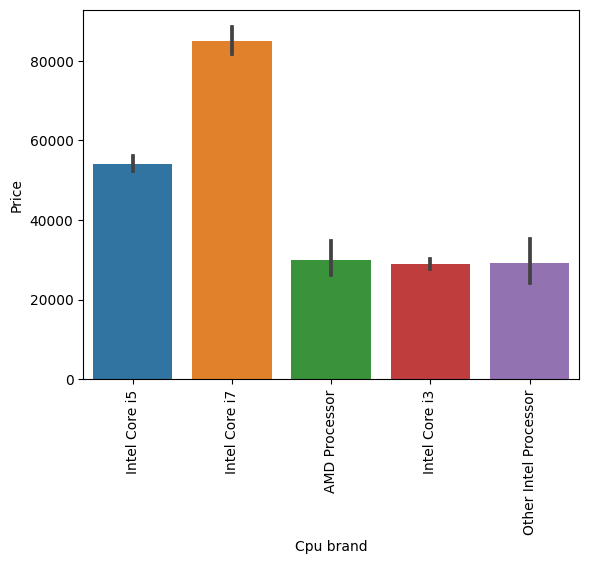

In [55]:
sns.barplot(x = data['Cpu brand'], y = data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [56]:
# drop extrra cpu cols
data.drop(columns=['Cpu','CpuName'], inplace=True)

In [57]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

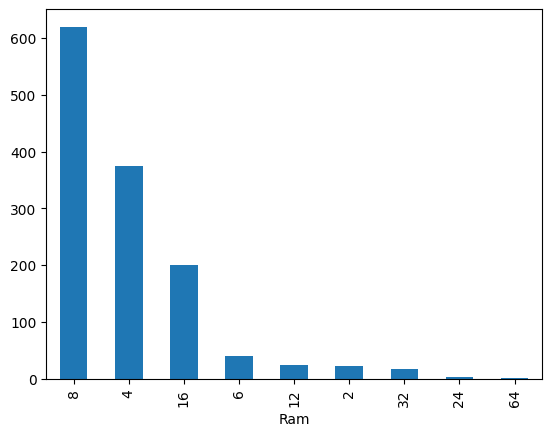

In [58]:
# analyse RAM col
data['Ram'].value_counts().plot(kind='bar')

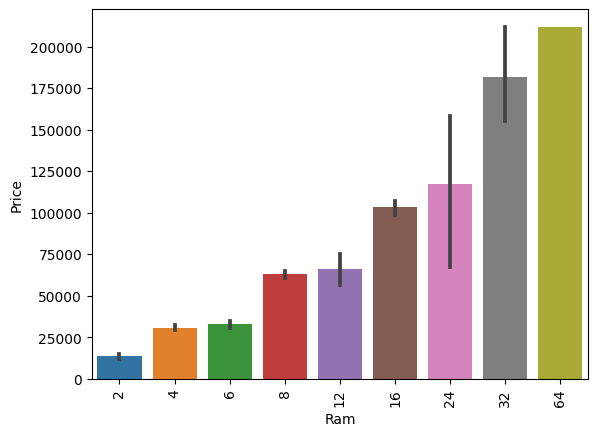

In [59]:
sns.barplot(x=data['Ram'], y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [60]:
# analyse memory column
data['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [61]:
# we will transform it into 4 cols : HDD, SDD, Flash storage, Hybrid
# for 256 SSD .....col SSD will have value 256 and others will have 0

data['Memory']=data['Memory'].astype(str).replace('\.0', '', regex=True)#regex true if pattern passed is regular expression
data['Memory']=data['Memory'].str.replace('GB', '') #by default regex is false
data['Memory']=data['Memory'].str.replace('TB','000')

new = data['Memory'].str.split("+", n=1, expand=True)

In [62]:
new.sample(5)

,0,1
376,128 SSD,None
65,512 SSD,None
1184,1000 HDD,None
961,256 SSD,None
787,1000 HDD,None


In [63]:
data["first"]=new[0]
data["first"]=data["first"].str.strip() #strip remove any leading or trailing whitespaces

data["second"] = new[1]

data["Layer1HDD"] = data["first"].apply(lambda x:1 if "HDD" in x else 0)
data["Layer1SSD"] = data["first"].apply(lambda x:1 if "SSD" in x else 0)
data["Layer1Hybrid"] = data["first"].apply(lambda x:1 if "Hybrid" in x else 0)
data["Layer1Flash_Storage"] = data["first"].apply(lambda x:1 if "Flash Storage" in x else 0)

data["first"] = data['first'].str.replace('\D', '', regex=True)

data['second'].fillna("0", inplace = True)

data["Layer2HDD"] = data["second"].apply(lambda x:1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x:1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x:1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x:1 if "Flash Storage" in x else 0)

data["second"] = data['second'].str.replace('\D', '', regex=True)

data["first"] = data["first"].astype('int64', errors = 'ignore')
data['second'] = data["second"].astype('int64', errors = 'ignore')


data["HDD"] = (data["first"]*data["Layer1HDD"]+data["second"]*data["Layer2HDD"])
data["SSD"] = (data["first"]*data["Layer1SSD"]+data["second"]*data["Layer2SSD"])
data["Hybrid"] = (data["first"]*data["Layer1Hybrid"]+data["second"]*data["Layer2Hybrid"])
data["Flash_Storage"] = (data["first"]*data["Layer1Flash_Storage"]+data["second"]*data["Layer2Flash_Storage"])


data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage', 'Layer2HDD',
                   'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'], inplace=True)

In [64]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [65]:
data.drop(columns=['Memory'], inplace=True)

In [66]:
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [67]:
# check corr
data.corr(numeric_only = True)['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [68]:
# analyzing gpu: too many categories
data['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [69]:
# we will take up just the brand names
data['GpuBrand'] = data['Gpu'].apply(lambda x:x.split()[0])

In [70]:
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,GpuBrand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel


In [71]:
data['GpuBrand'].value_counts()

GpuBrand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [72]:
# remove ARM as it is of no use
data = data[data['GpuBrand'] != 'ARM']

In [73]:
data['GpuBrand'].value_counts()

GpuBrand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

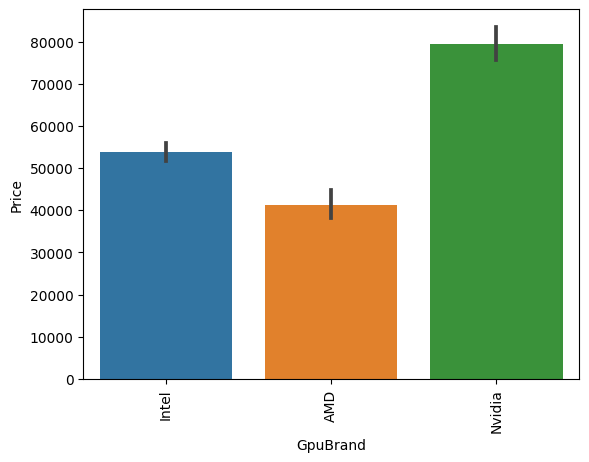

In [74]:
sns.barplot(x=data['GpuBrand'], y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [75]:
data.drop(columns=['Gpu'], inplace=True)

In [76]:
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,GpuBrand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel


In [77]:
# analyze opsys
data['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

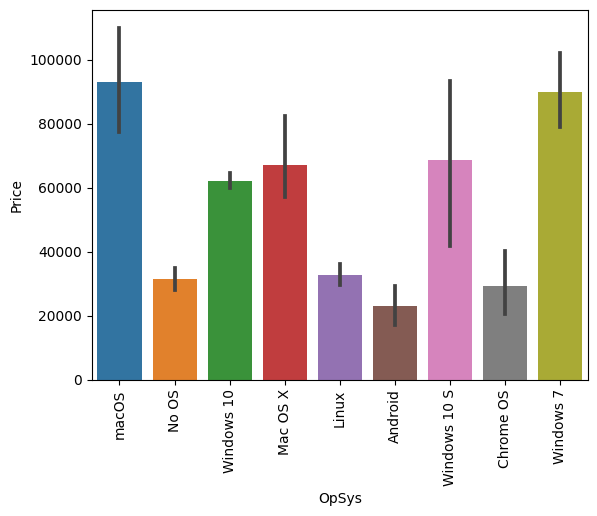

In [78]:
sns.barplot(x=data['OpSys'], y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [79]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/Linux/No OS'

In [80]:
data['os'] = data['OpSys'].apply(cat_os)

In [81]:
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,GpuBrand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Others/Linux/No OS
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac


In [82]:
data.drop(columns=['OpSys'], inplace=True)

In [83]:
data.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,GpuBrand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Others/Linux/No OS
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac


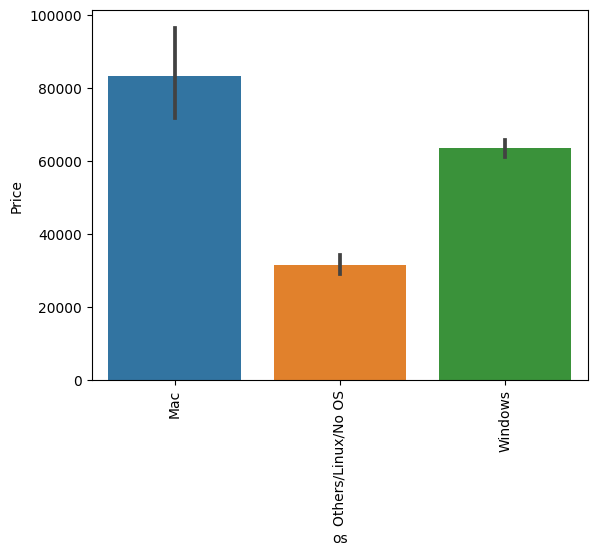

In [84]:
sns.barplot(x=data['os'], y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_7708\691883467.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

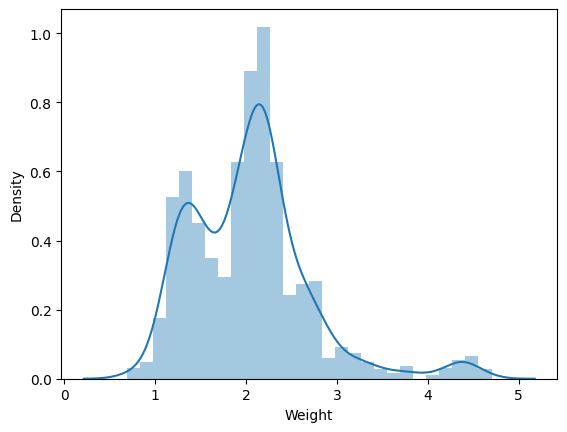

In [85]:
# analyze weight
# sns.barplot(x=data['Weight'], y=data['Price'])
# plt.xticks(rotation='vertical')
# plt.show()
sns.distplot(data['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

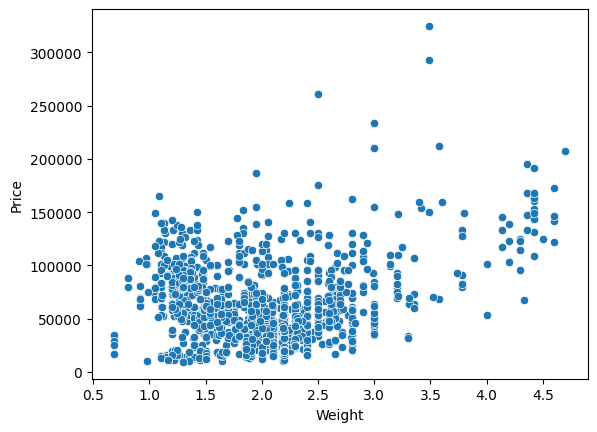

In [86]:
sns.scatterplot(x=data['Weight'], y=data['Price'])

In [87]:
data.corr(numeric_only=True)['Price']

Ram              0.742905
Weight           0.209867
Price            1.000000
Touchscreen      0.192917
Ips              0.253320
ppi              0.475368
HDD             -0.096891
SSD              0.670660
Hybrid           0.007942
Flash_Storage   -0.040067
Name: Price, dtype: float64

In [88]:
# analyse all columns all together
data.corr(numeric_only=True)

,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD,Hybrid,Flash_Storage
Ram,1.000000,0.383362,0.742905,0.118875,0.207949,0.305688,0.095808,0.603379,0.038409,-0.059612
Weight,0.383362,1.000000,0.209867,-0.293004,0.018643,-0.321883,0.514147,-0.063818,0.095122,-0.179165
Price,0.742905,0.209867,1.000000,0.192917,0.253320,0.475368,-0.096891,0.670660,0.007942,-0.040067
Touchscreen,0.118875,-0.293004,0.192917,1.000000,0.148026,0.458571,-0.208766,0.257577,-0.039591,-0.020809
Ips,0.207949,0.018643,0.253320,0.148026,1.000000,0.299142,-0.093588,0.225311,-0.022505,0.068616
ppi,0.305688,-0.321883,0.475368,0.458571,0.299142,1.000000,-0.294698,0.509437,-0.020095,0.076479
HDD,0.095808,0.514147,-0.096891,-0.208766,-0.093588,-0.294698,1.000000,-0.400750,-0.076674,-0.117165
SSD,0.603379,-0.063818,0.670660,0.257577,0.225311,0.509437,-0.400750,1.000000,-0.059845,-0.147407
Hybrid,0.038409,0.095122,0.007942,-0.039591,-0.022505,-0.020095,-0.076674,-0.059845,1.000000,-0.014307
Flash_Storage,-0.059612,-0.179165,-0.040067,-0.020809,0.068616,0.076479,-0.117165,-0.147407,-0.014307,1.000000


<Axes: >

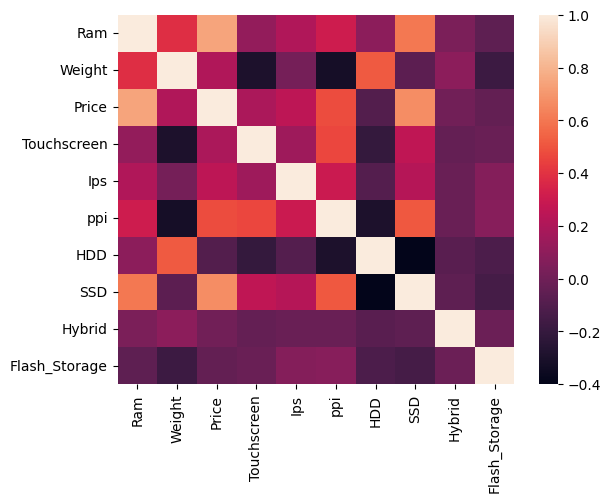

In [89]:
sns.heatmap(data.corr(numeric_only=True))

In [90]:
# flash storage and hybrid can be dropped as they are not making much difference
data.drop(columns=['Hybrid', 'Flash_Storage'], inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7708\3936774256.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

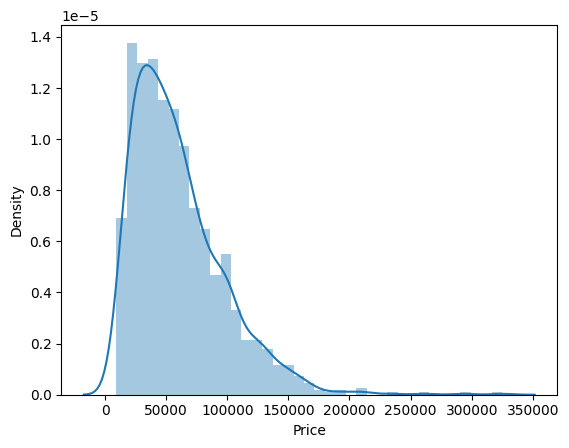

In [91]:
# our target column is skewed so we will apply log transformation
sns.distplot(data['Price'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_7708\1217823497.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data['Price']))


<Axes: xlabel='Price', ylabel='Density'>

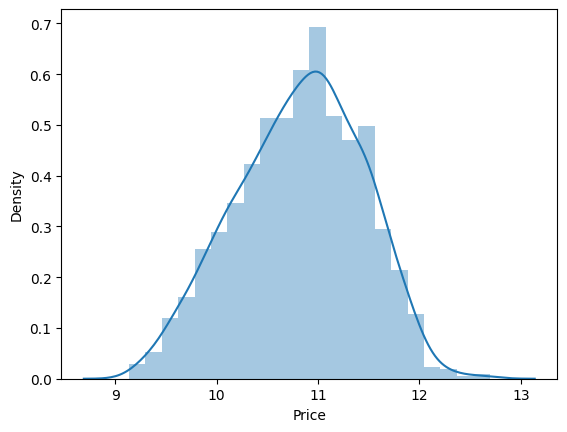

In [92]:
# if we apply log transformation
sns.distplot(np.log(data['Price']))
# make sure to apply exp function while predicting price

In [93]:
X = data.drop(columns=['Price'])
Y = np.log(data['Price'])

In [94]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,GpuBrand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/Linux/No OS
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [95]:
Y #prices decreased due to log function

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [97]:
# One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [98]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [99]:
# LinearRegression
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first', categories='auto', handle_unknown = 'ignore'), [0,1,7,10,11])],
                                remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([('step1', step1), ('step2', step2)])
               
pipe.fit(X_train, Y_train)

y_pred = pipe.predict(X_test)

print('R2 Score', r2_score(Y_test, y_pred))
print('MAE', mean_absolute_error(Y_test, y_pred))

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score 0.800240596612301
MAE 0.20453995815620046


In [100]:
np.exp(0.21)

1.2336780599567432

In [102]:
# testing algorithm turn by turn
# RidgeRegression

step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first', categories='auto', handle_unknown = 'ignore'), [0,1,7,10,11])],
                                remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([('step1', step1), ('step2', step2)])
               
pipe.fit(X_train, Y_train)

y_pred = pipe.predict(X_test)

print('R2 Score', r2_score(Y_test, y_pred))
print('MAE', mean_absolute_error(Y_test, y_pred))

# R2 sccore improved a bit

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score 0.8025355126649508
MAE 0.20379724333815166


In [103]:
# Lasso
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first', categories='auto', handle_unknown = 'ignore'), [0,1,7,10,11])],
                                remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([('step1', step1), ('step2', step2)])
               
pipe.fit(X_train, Y_train)

y_pred = pipe.predict(X_test)

print('R2 Score', r2_score(Y_test, y_pred))
print('MAE', mean_absolute_error(Y_test, y_pred))

R2 Score 0.7980036909700868
MAE 0.20604038236395078


C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [104]:
# KNN
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first', categories='auto', handle_unknown = 'ignore'), [0,1,7,10,11])],
                                remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([('step1', step1), ('step2', step2)])
               
pipe.fit(X_train, Y_train)

y_pred = pipe.predict(X_test)

print('R2 Score', r2_score(Y_test, y_pred))
print('MAE', mean_absolute_error(Y_test, y_pred))

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score 0.788032983794606
MAE 0.19716190715389145


In [106]:
# decision Tree
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first', categories='auto', handle_unknown = 'ignore'), [0,1,7,10,11])],
                                remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([('step1', step1), ('step2', step2)])
               
pipe.fit(X_train, Y_train)

y_pred = pipe.predict(X_test)

print('R2 Score', r2_score(Y_test, y_pred))
print('MAE', mean_absolute_error(Y_test, y_pred))

R2 Score 0.8055224370978747
MAE 0.19665073976720557


C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [107]:
# SVM
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first' categories='auto', handle_unknown = 'ignore'), [0,1,7,10,11])],
                                remainder='passthrough')

step2 = SVR(kernel='rbf', C=10000, epsilon=0.1)

pipe = Pipeline([('step1', step1), ('step2', step2)])
               
pipe.fit(X_train, Y_train)

y_pred = pipe.predict(X_test)

print('R2 Score', r2_score(Y_test, y_pred))
print('MAE', mean_absolute_error(Y_test, y_pred))

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2569658313.py, line 2)

In [108]:
# RandomForest

step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first', categories='auto', handle_unknown = 'ignore'), [0,1,7,10,11])],
                                remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100, random_state=3,
                             max_samples=0.5, max_features=0.75, max_depth=15)

pipe = Pipeline([('step1', step1), ('step2', step2)])
               
pipe.fit(X_train, Y_train)

y_pred = pipe.predict(X_test)

print('R2 Score', r2_score(Y_test, y_pred))
print('MAE', mean_absolute_error(Y_test, y_pred))

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score 0.8616909015424339
MAE 0.16695460261306985


In [109]:
# Extra trees
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first', categories='auto', handle_unknown = 'ignore'), [0,1,7,10,11])],
                                remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100, random_state=3, max_features=0.75, max_depth=15)

pipe = Pipeline([('step1', step1), ('step2', step2)])
               
pipe.fit(X_train, Y_train)

y_pred = pipe.predict(X_test)

print('R2 Score', r2_score(Y_test, y_pred))
print('MAE', mean_absolute_error(Y_test, y_pred))

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score 0.8522039043312326
MAE 0.1655931810263273


In [110]:
# AdaBoost

step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first', categories='auto', handle_unknown = 'ignore'), [0,1,7,10,11])],
                                remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15, learning_rate=1.0)

pipe = Pipeline([('step1', step1), ('step2', step2)])
               
pipe.fit(X_train, Y_train)

y_pred = pipe.predict(X_test)

print('R2 Score', r2_score(Y_test, y_pred))
print('MAE', mean_absolute_error(Y_test, y_pred))

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score 0.784559730406631
MAE 0.22408276516739878


In [111]:
# Gradient Boost
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first', categories='auto', handle_unknown = 'ignore'), [0,1,7,10,11])],
                                remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([('step1', step1), ('step2', step2)])
               
pipe.fit(X_train, Y_train)

y_pred = pipe.predict(X_test)

print('R2 Score', r2_score(Y_test, y_pred))
print('MAE', mean_absolute_error(Y_test, y_pred))

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score 0.8622859521563377
MAE 0.16381549040858429


In [112]:
# Xgboost
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first', categories='auto', handle_unknown = 'ignore'), [0,1,7,10,11])],
                                remainder='passthrough')

step2 = XGBRegressor(n_estimators=45, max_depth=5, learning_rate=0.5)

pipe = Pipeline([('step1', step1), ('step2', step2)])
               
pipe.fit(X_train, Y_train)

y_pred = pipe.predict(X_test)

print('R2 Score', r2_score(Y_test, y_pred))
print('MAE', mean_absolute_error(Y_test, y_pred))

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score 0.8567622649053193
MAE 0.16620902434335433


In [113]:
# Voting Regressor - combining best models
from sklearn.ensemble import VotingRegressor, StackingRegressor

step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first', categories='auto', handle_unknown = 'ignore'), [0,1,7,10,11])],
                                remainder='passthrough')

rf = RandomForestRegressor(n_estimators=350, random_state=3, max_features=0.75, max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100, max_features=0.5)
xgb = XGBRegressor(n_estimators=25, learning_rate=0.3, max_depth=5)
lr = LinearRegression()
et = ExtraTreesRegressor(n_estimators=100,  random_state=3, max_features=0.75, max_depth=16)

step2 = VotingRegressor([('rf', rf), ('gbdt',gbdt), ('xgb', xgb), ('et', et)], weights=[5,1,1,1])

pipe = Pipeline([('step1', step1), ('step2', step2)])
               
pipe.fit(X_train, Y_train)

y_pred = pipe.predict(X_test)

print('R2 Score', r2_score(Y_test, y_pred))
print('MAE', mean_absolute_error(Y_test, y_pred))

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score 0.8744343787279688
MAE 0.159637563764385


In [125]:
# Stcking Regressor

step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])],
                                remainder='passthrough')
estimators = [
('rf', RandomForestRegressor(n_estimators=350, random_state=3, max_features=0.75, max_depth=15)),
('gbdt', GradientBoostingRegressor(n_estimators=100, max_features=0.5)),
('xgb', XGBRegressor(n_estimators=25, learning_rate=0.3, max_depth=5))]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([('step1', step1), ('step2', step2)])
               
pipe.fit(X_train, Y_train)

y_pred = pipe.predict(X_test)

print('R2 Score', r2_score(Y_test, y_pred))
print('MAE', mean_absolute_error(Y_test, y_pred))

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score 0.87283811230965
MAE 0.16397535182046571


In [115]:
# Exporting the model
import pickle

pickle.dump(data, open('data.pkl', 'wb'))
pickle.dump(pipe, open('pipe.pkl', 'wb'))

In [129]:
X_test

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,GpuBrand,os
248,HP,Notebook,4,1.49,0,1,165.632118,Intel Core i5,500,0,Intel,Windows
555,Asus,Notebook,4,2.00,0,0,100.454670,Other Intel Processor,500,0,Intel,Others/Linux/No OS
1251,HP,Notebook,4,1.86,0,0,100.454670,AMD Processor,500,0,AMD,Windows
547,Lenovo,Notebook,4,2.15,0,0,141.211998,Intel Core i5,1000,0,Intel,Others/Linux/No OS
885,HP,2 in 1 Convertible,4,1.28,1,0,165.632118,Intel Core i5,0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
861,HP,Notebook,8,1.84,0,0,141.211998,Intel Core i5,0,256,AMD,Windows
1204,Asus,Gaming,8,2.20,0,0,141.211998,Intel Core i7,1000,0,Nvidia,Windows
790,Asus,Gaming,8,2.24,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1046,HP,Notebook,8,1.43,0,0,157.350512,Intel Core i5,0,256,Intel,Windows
